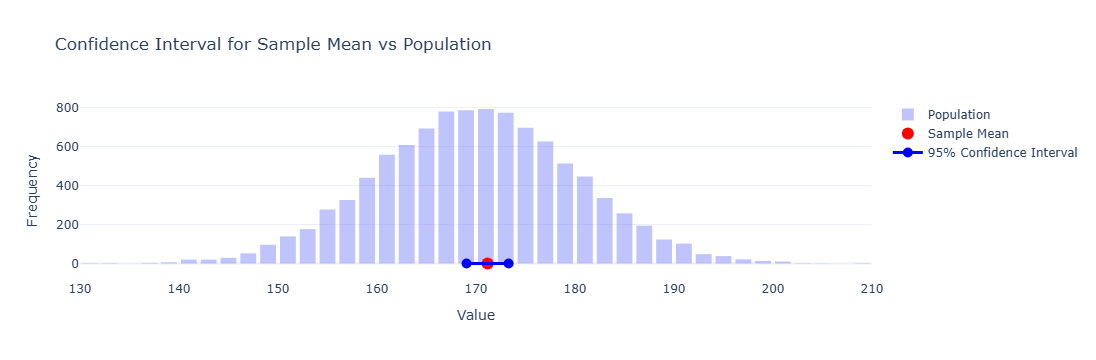

In [1]:
import numpy as np
import plotly.graph_objects as go
import scipy.stats as st

# Simulate a population
np.random.seed(42)
population = np.random.normal(loc=170, scale=10, size=10000)  # mean=170, sd=10

# Take a random sample
sample_size = 100
sample = np.random.choice(population, size=sample_size, replace=False)

# Sample mean and standard error
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
se = sample_std / np.sqrt(sample_size)

# 95% confidence interval for mean
ci_low, ci_high = st.t.interval(0.95, df=sample_size-1, loc=sample_mean, scale=se)

# Create figure
fig = go.Figure()

# Plot population distribution (histogram)
fig.add_trace(go.Histogram(x=population, nbinsx=50, name="Population", opacity=0.4))

# Plot sample mean
fig.add_trace(go.Scatter(x=[sample_mean], y=[0], mode="markers", 
                         marker=dict(color="red", size=12), name="Sample Mean"))

# Plot confidence interval as a line
fig.add_trace(go.Scatter(x=[ci_low, ci_high], y=[0, 0], mode="lines+markers",
                         marker=dict(color="blue", size=10),
                         line=dict(color="blue", width=3),
                         name="95% Confidence Interval"))

# Layout
fig.update_layout(
    title="Confidence Interval for Sample Mean vs Population",
    xaxis_title="Value",
    yaxis_title="Frequency",
    bargap=0.2,
    template="plotly_white"
)

fig.show()


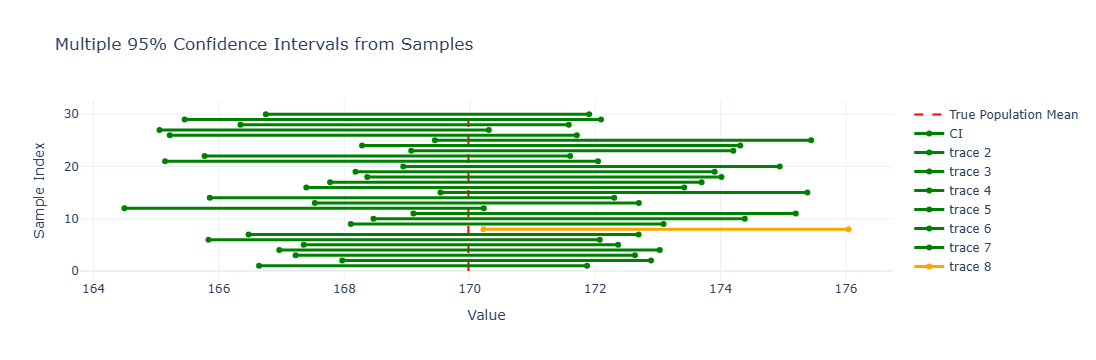

In [2]:
# Simulate multiple samples and confidence intervals to visualize coverage

num_samples = 30
sample_size = 50

intervals = []
means = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    se = sample_std / np.sqrt(sample_size)
    ci_low, ci_high = st.t.interval(0.95, df=sample_size-1, loc=sample_mean, scale=se)
    intervals.append((ci_low, ci_high))
    means.append(sample_mean)

# Create figure
fig = go.Figure()

# Plot true population mean
true_mean = np.mean(population)
fig.add_trace(go.Scatter(x=[true_mean, true_mean], y=[0, num_samples+1],
                         mode="lines", line=dict(color="red", dash="dash"),
                         name="True Population Mean"))

# Plot confidence intervals for each sample
for i, ((ci_low, ci_high), mean) in enumerate(zip(intervals, means), 1):
    color = "green" if ci_low <= true_mean <= ci_high else "orange"
    fig.add_trace(go.Scatter(x=[ci_low, ci_high], y=[i, i], mode="lines+markers",
                             line=dict(color=color, width=3),
                             marker=dict(size=6, color=color),
                             name="CI" if i == 1 else None))

# Layout
fig.update_layout(
    title="Multiple 95% Confidence Intervals from Samples",
    xaxis_title="Value",
    yaxis_title="Sample Index",
    showlegend=True,
    template="plotly_white"
)

fig.show()


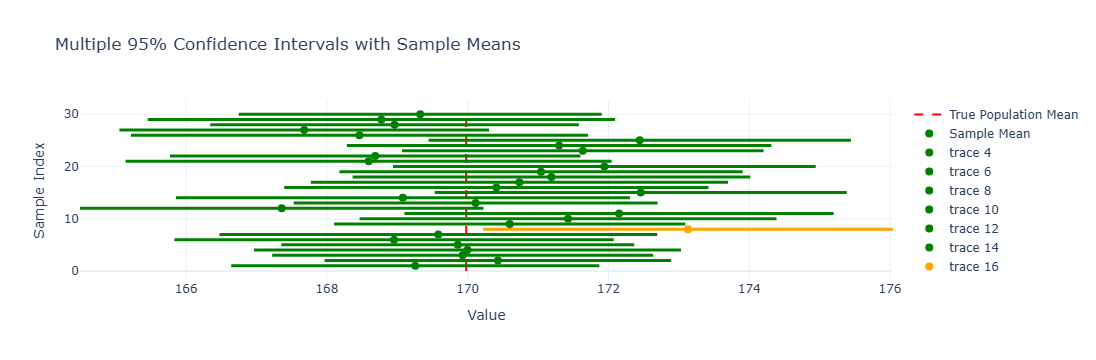

In [3]:
# Create figure again with sample means added

fig = go.Figure()

# Plot true population mean
fig.add_trace(go.Scatter(x=[true_mean, true_mean], y=[0, num_samples+1],
                         mode="lines", line=dict(color="red", dash="dash"),
                         name="True Population Mean"))

# Plot confidence intervals with sample means
for i, ((ci_low, ci_high), mean) in enumerate(zip(intervals, means), 1):
    color = "green" if ci_low <= true_mean <= ci_high else "orange"
    
    # CI line
    fig.add_trace(go.Scatter(x=[ci_low, ci_high], y=[i, i], mode="lines",
                             line=dict(color=color, width=3),
                             showlegend=False))
    
    # Sample mean point
    fig.add_trace(go.Scatter(x=[mean], y=[i], mode="markers",
                             marker=dict(size=8, color=color, symbol="circle"),
                             name="Sample Mean" if i == 1 else None))

# Layout
fig.update_layout(
    title="Multiple 95% Confidence Intervals with Sample Means",
    xaxis_title="Value",
    yaxis_title="Sample Index",
    showlegend=True,
    template="plotly_white"
)

fig.show()
